
# Decision Tree Classification Project

This notebook:
- Runs the **full pipeline**
- Saves **all outputs to folders**
- **Displays all graphs inline**

---


## 1. Imports & Folder Setup

In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Ensure folders
folders = ["data/raw", "data/processed", "models", "reports", "outputs"]
for f in folders:
    os.makedirs(f, exist_ok=True)


## 2. Load Dataset

In [2]:

DATA_PATH = "data/raw/heart_disease.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError("Dataset not found in data/raw/")

df_raw = pd.read_csv(DATA_PATH)
display(df_raw.head())
print("Shape:", df_raw.shape)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,33,1,1,100,341,1,0,203,0,2.770363,0,2,2,1
1,66,1,2,174,536,0,0,151,1,3.133505,0,2,2,4
2,60,0,3,110,155,0,0,155,0,1.285958,0,0,1,1
3,50,0,3,131,174,0,2,174,0,0.837742,1,3,3,0
4,49,1,3,197,363,0,0,105,1,1.130846,0,3,3,3


Shape: (303, 14)


## 3. Preprocessing

In [3]:

df = df_raw.copy()

df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
df = df.drop_duplicates()
df = df.fillna(df.mean(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

df.to_csv("data/processed/cleaned_data.csv", index=False)
display(df.head())


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,33,1,1,100,341,1,0,203,0,2.770363,0,2,2,1
1,66,1,2,174,536,0,0,151,1,3.133505,0,2,2,4
2,60,0,3,110,155,0,0,155,0,1.285958,0,0,1,1
3,50,0,3,131,174,0,2,174,0,0.837742,1,3,3,0
4,49,1,3,197,363,0,0,105,1,1.130846,0,3,3,3


## 4. Feature Engineering

In [4]:

label_cols = ["sex", "fbs", "exang"]
onehot_cols = ["cp", "restecg", "slope", "thal"]
scale_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

le = LabelEncoder()
for c in label_cols:
    if c in df.columns:
        df[c] = le.fit_transform(df[c].astype(str))

df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

display(df.head())


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,-1.482115,1,-1.534124,-0.120260,1,1.611305,0,-0.155272,2,1,True,False,False,False,False,False,False,False,True,False
1,1.036095,1,0.929396,1.271075,0,0.317729,1,0.050768,2,4,False,True,False,False,False,False,False,False,True,False
2,0.578239,0,-1.201216,-1.447379,0,0.417235,0,-0.997498,0,1,False,False,True,False,False,False,False,True,False,False
3,-0.184855,0,-0.502109,-1.311813,0,0.889887,0,-1.251809,3,0,False,False,True,False,True,True,False,False,False,True
4,-0.261164,1,1.695085,0.036711,0,-0.826588,1,-1.085506,3,3,False,False,True,False,False,False,False,False,False,True


## 5. Exploratory Data Analysis (FIXED)

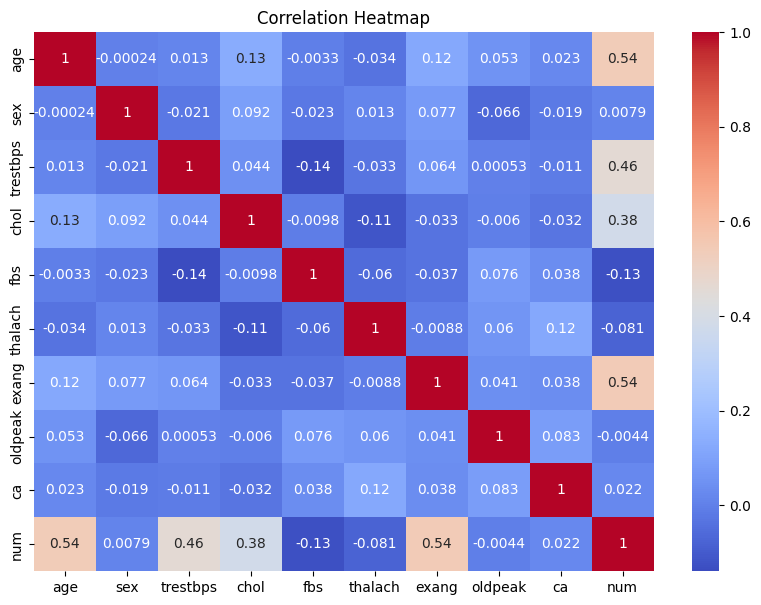

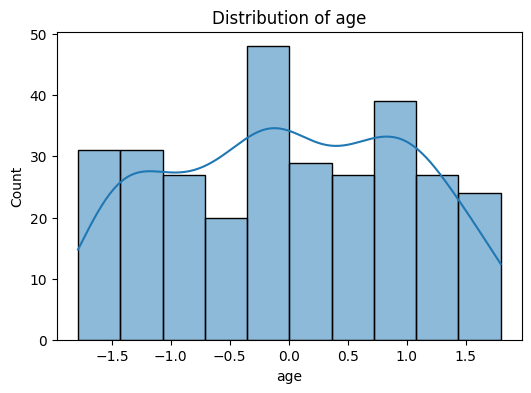

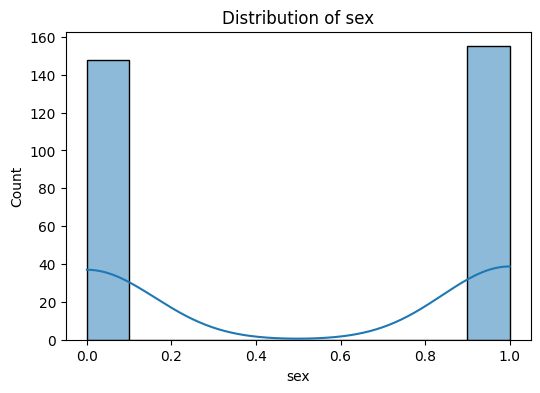

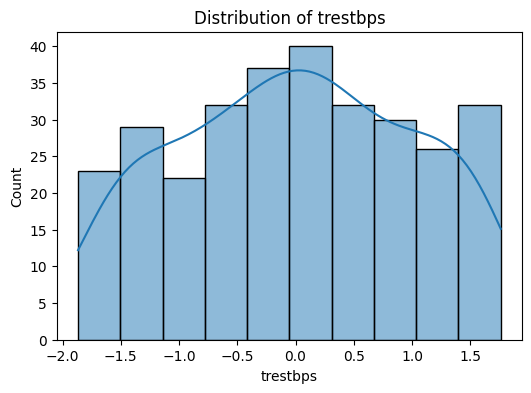

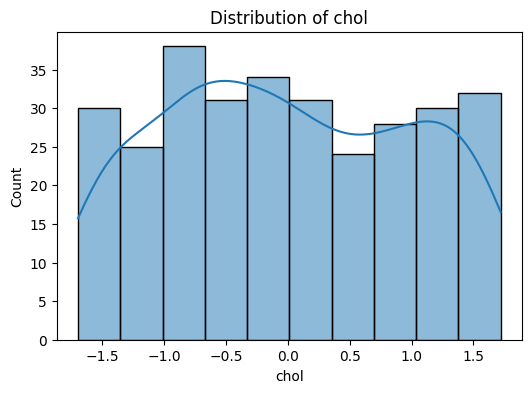

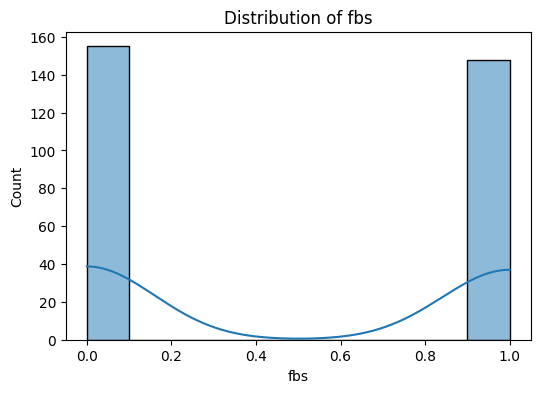

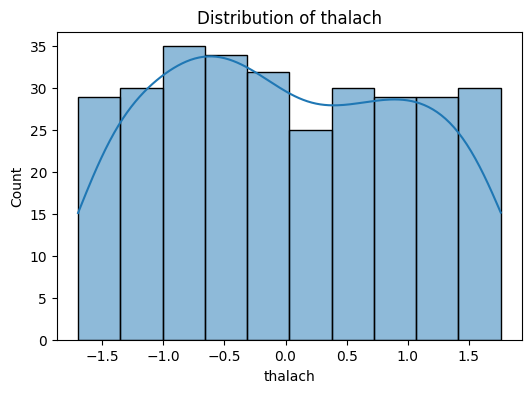

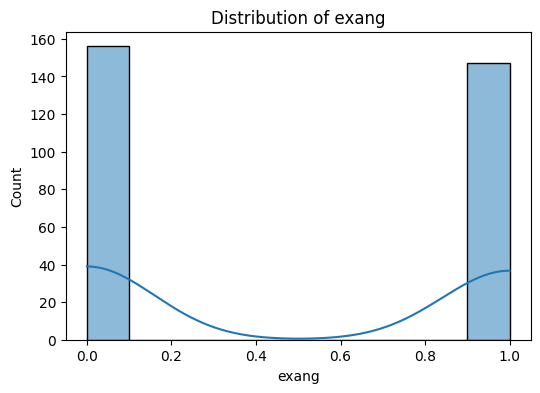

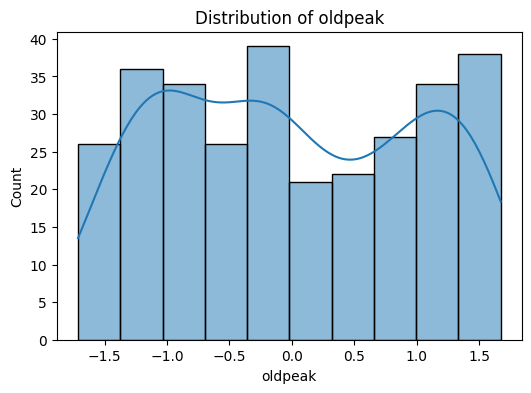

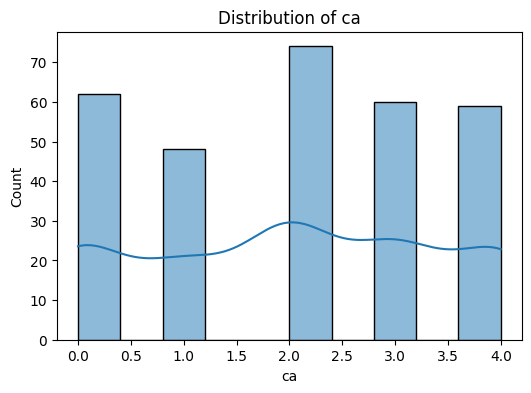

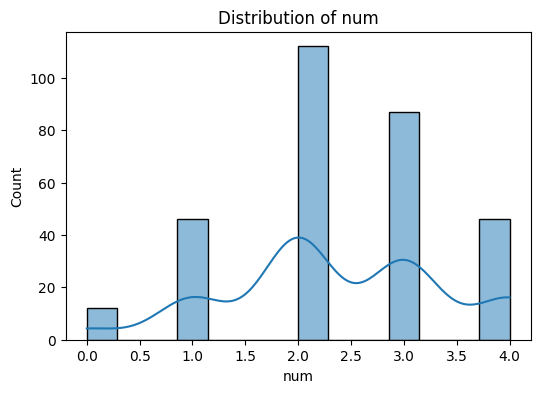

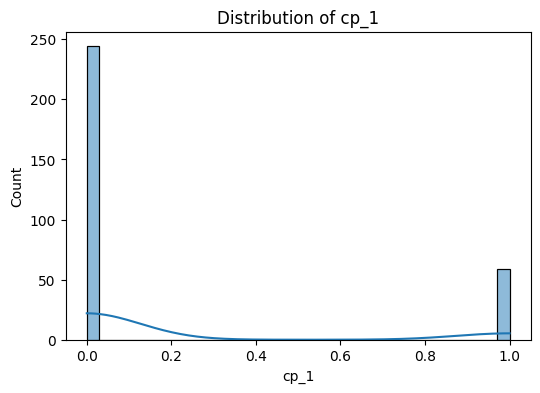

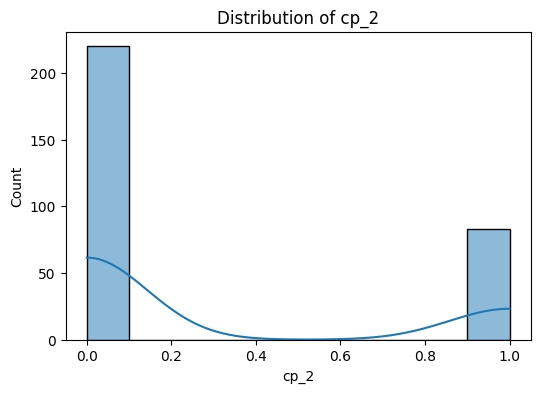

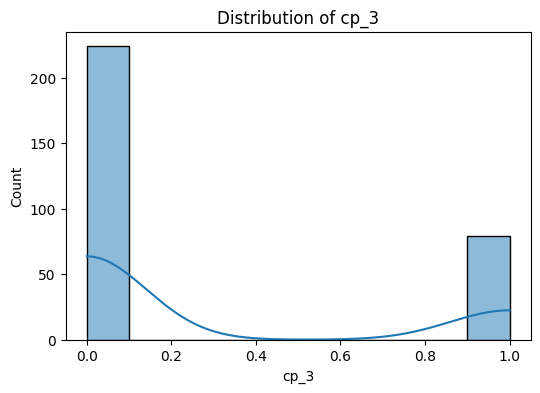

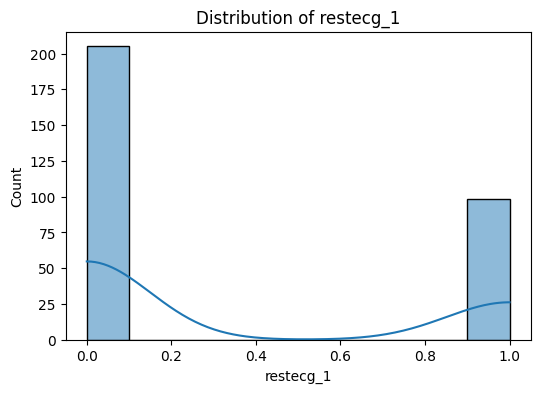

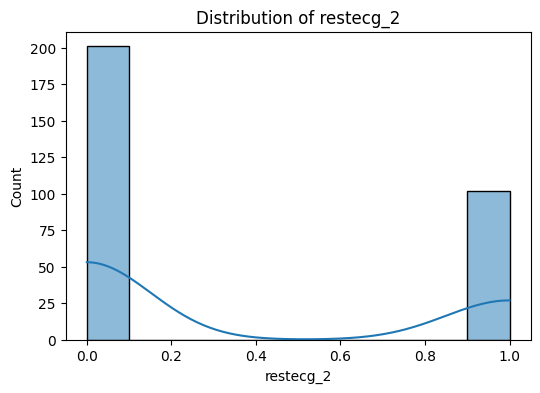

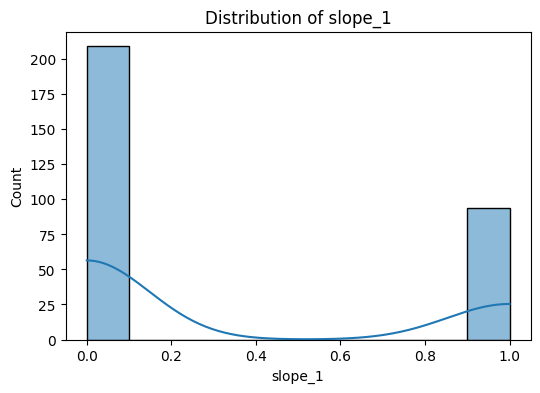

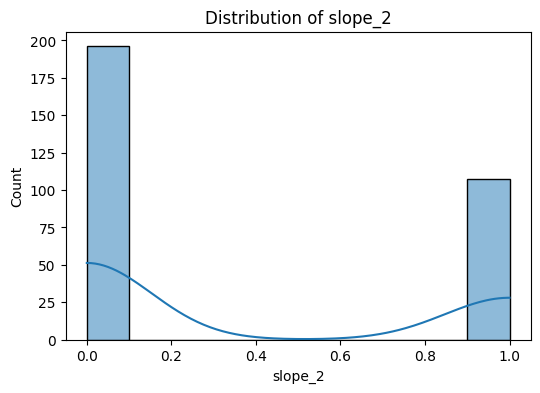

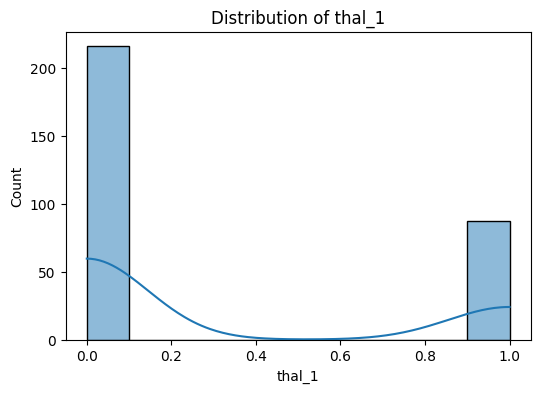

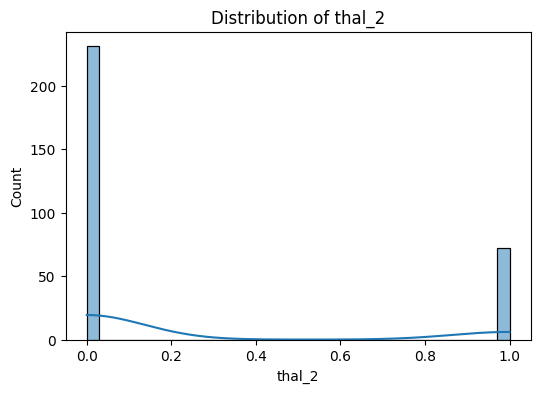

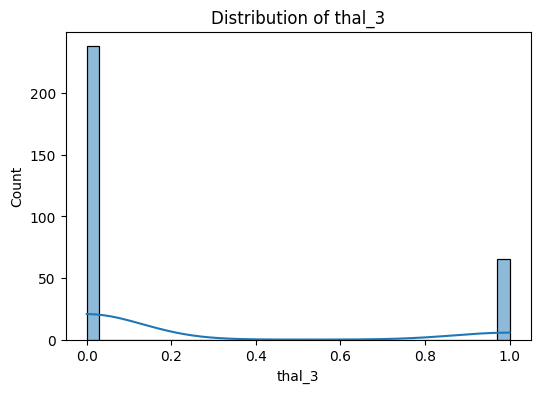

In [5]:

# Summary
df.describe().to_csv("reports/summary_statistics.csv")
df.isnull().sum().to_csv("reports/missing_values.csv")

# Correlation Heatmap
numeric_df = df.select_dtypes(include="number")
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("reports/correlation_heatmap.png", dpi=300)
plt.show()

# Distribution plots (FIXED LOOP)
for col in df.columns:
    if df[col].dtype != "object":
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        path = f"reports/dist_{col}.png"
        plt.savefig(path, dpi=300)
        plt.show()


## 6. Train Decision Tree

In [6]:

TARGET = "num"

X = df.drop(columns=[TARGET])
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## 7. Evaluation

{'accuracy': 0.9508196721311475, 'precision': 0.9743169398907104, 'recall': 0.9508196721311475, 'f1': 0.9580013195960005}


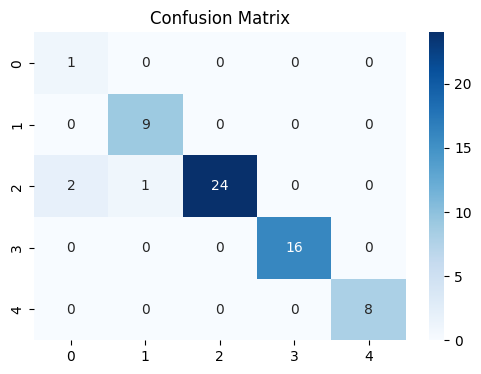

In [7]:

y_pred = model.predict(X_test)

metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, average="weighted"),
    "recall": recall_score(y_test, y_pred, average="weighted"),
    "f1": f1_score(y_test, y_pred, average="weighted"),
}

print(metrics)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.savefig("outputs/confusion_matrix.png", dpi=300)
plt.show()

with open("outputs/metrics.json", "w") as f:
    import json
    json.dump(metrics, f, indent=4)


In [8]:
# ================================
# SAVE TRAINED DECISION TREE MODEL
# ================================

import os
import joblib

# Create models folder if missing
os.makedirs("models", exist_ok=True)

# Save model
joblib.dump(model, "models/decision_tree_model.pkl")

print("✅ Model saved successfully in models/decision_tree_model.pkl")


✅ Model saved successfully in models/decision_tree_model.pkl


## 8. Decision Tree Visualization

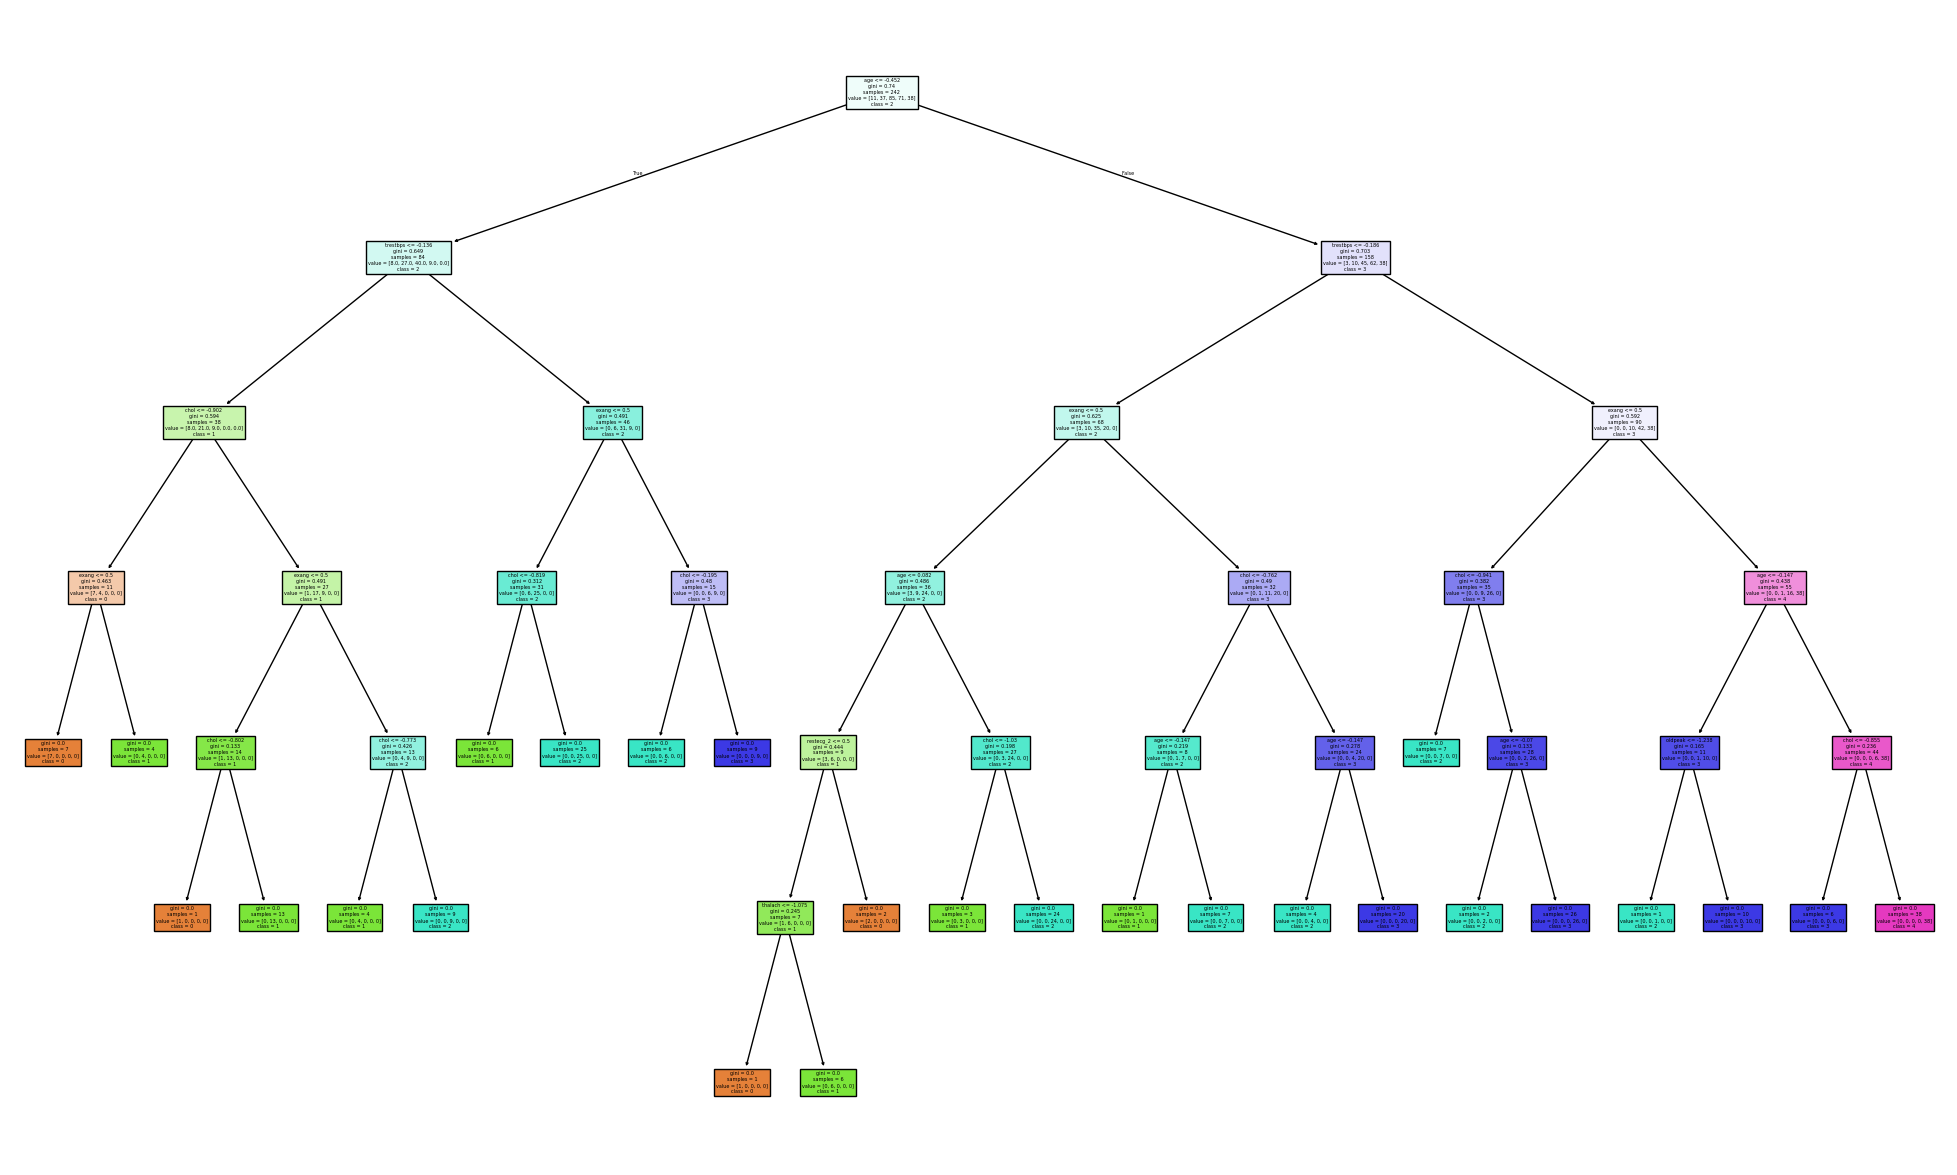

In [9]:

plt.figure(figsize=(25,15))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True
)
plt.savefig("outputs/decision_tree_plot.png", dpi=300)
plt.show()



## ✅ Pipeline Complete

All graphs are:
- **Saved to folders**
- **Displayed inline**
- **Correctly generated**
